In [96]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [5]:
stats = pd.read_csv(r"C:\Users\aniqp\Documents\MVP Prediction Project\Jupyter Notebook Files\player_mvp_stats.csv")

In [6]:
stats

,Unnamed: 0,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
0,0,A.C. Green,PF,27,LAL,82,21,26.4,3.1,6.6,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
1,1,Byron Scott,SG,29,LAL,82,82,32.1,6.1,12.8,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
2,2,Elden Campbell,PF,22,LAL,52,0,7.3,1.1,2.4,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
3,3,Irving Thomas,PF,25,LAL,26,0,4.2,0.7,1.9,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
4,4,James Worthy,SF,29,LAL,78,74,38.6,9.2,18.7,...,0.0,0.0,Los Angeles Lakers,58,24,0.707,5.0,106.3,99.6,6.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14087,14087,Spencer Hawes,PF,28,MIL,54,1,14.8,2.5,5.1,...,0.0,0.0,Milwaukee Bucks,42,40,0.512,9.0,103.6,103.8,-0.45
14088,14088,Steve Novak,PF,33,MIL,8,0,2.8,0.3,0.9,...,0.0,0.0,Milwaukee Bucks,42,40,0.512,9.0,103.6,103.8,-0.45
14089,14089,Terrence Jones,PF,25,MIL,54,12,23.5,4.3,9.1,...,0.0,0.0,Milwaukee Bucks,42,40,0.512,9.0,103.6,103.8,-0.45
14090,14090,Thon Maker,C,19,MIL,57,34,9.9,1.5,3.2,...,0.0,0.0,Milwaukee Bucks,42,40,0.512,9.0,103.6,103.8,-0.45


In [8]:
del stats["Unnamed: 0"]

In [9]:
pd.isnull(stats).sum()

Player        0
Pos           0
Age           0
Tm            0
G             0
GS            0
MP            0
FG            0
FGA           0
FG%          50
3P            0
3PA           0
3P%        2042
2P            0
2PA           0
2P%          84
eFG%         50
FT            0
FTA           0
FT%         462
ORB           0
DRB           0
TRB           0
AST           0
STL           0
BLK           0
TOV           0
PF            0
PTS           0
Year          0
Pts Won       0
Pts Max       0
Share         0
Team          0
W             0
L             0
W/L%          0
GB            0
PS/G          0
PA/G          0
SRS           0
dtype: int64

In [11]:
stats = stats.fillna(0)

In [10]:
stats[pd.isnull(stats["3P%"])][["Player", "3PA"]]

,Player,3PA
2,Elden Campbell,0.0
3,Irving Thomas,0.0
18,Jack Haley,0.0
20,Keith Owens,0.0
30,Benoit Benjamin,0.0
...,...,...
14061,Evan Eschmeyer,0.0
14062,Gheorghe Mureșan,0.0
14064,Jim McIlvaine,0.0
14070,Mark Hendrickson,0.0


<AxesSubplot:>

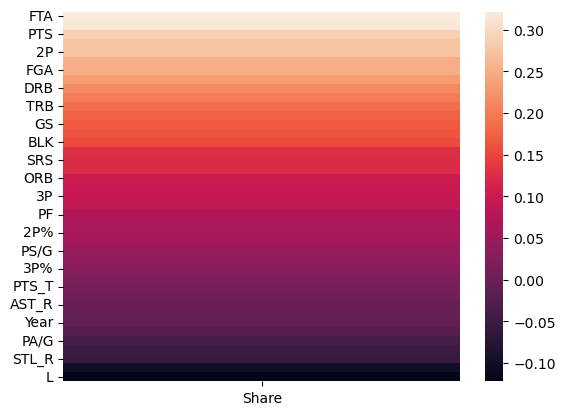

In [120]:
sns.heatmap(pd.DataFrame(stats.corr().iloc[29]).sort_values('Share', ascending = False).iloc[3:])

In [12]:
stats.columns

Index(['Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 'Year',
       'Pts Won', 'Pts Max', 'Share', 'Team', 'W', 'L', 'W/L%', 'GB', 'PS/G',
       'PA/G', 'SRS'],
      dtype='object')

In [13]:
stats['Age'] = stats['Age'].astype(int)

In [14]:
# Numeric columns are the ones we want to use as predictors. Don't use pts won/pts max/share - these are very related with what we are trying to predict (overfitting)
predictors = ['Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P',
       '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB',
       'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS',
       'W', 'L', 'W/L%', 'GB', 'PS/G',
       'PA/G', 'SRS']
scaler = StandardScaler()
stats[predictors] = scaler.fit_transform(stats[predictors])

In [15]:
stats['Year']

0        1991
1        1991
2        1991
3        1991
4        1991
         ... 
14087    2017
14088    2017
14089    2017
14090    2017
14091    2017
Name: Year, Length: 14092, dtype: int64

In [16]:
train = stats[stats["Year"] < 2021]

In [17]:
train

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,Pts Max,Share,Team,W,L,W/L%,GB,PS/G,PA/G,SRS
0,A.C. Green,PF,0.058795,LAL,1.171440,-0.159133,0.595149,0.001359,-0.061556,0.406065,...,0.0,0.0,Los Angeles Lakers,1.428952,-1.250866,1.352002,-0.811094,0.827496,-0.174238,1.496245
1,Byron Scott,SG,0.530227,LAL,1.171440,1.939334,1.158642,1.362513,1.275068,0.416473,...,0.0,0.0,Los Angeles Lakers,1.428952,-1.250866,1.352002,-0.811094,0.827496,-0.174238,1.496245
2,Elden Campbell,PF,-1.119785,LAL,-0.023728,-0.881556,-1.293046,-0.906077,-0.967011,0.187501,...,0.0,0.0,Los Angeles Lakers,1.428952,-1.250866,1.352002,-0.811094,0.827496,-0.174238,1.496245
3,Irving Thomas,PF,-0.412637,LAL,-1.059539,-0.881556,-1.599507,-1.087565,-1.074803,-1.009401,...,0.0,0.0,Los Angeles Lakers,1.428952,-1.250866,1.352002,-0.811094,0.827496,-0.174238,1.496245
4,James Worthy,SF,0.530227,LAL,1.012084,1.664125,1.801221,2.769039,2.547016,0.572591,...,0.0,0.0,Los Angeles Lakers,1.428952,-1.250866,1.352002,-0.811094,0.827496,-0.174238,1.496245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14087,Spencer Hawes,PF,0.294511,MIL,0.055950,-0.847155,-0.551608,-0.270872,-0.384933,0.489328,...,0.0,0.0,Milwaukee Bucks,0.188553,-0.006370,0.098790,-0.507018,0.429264,0.436553,-0.075477
14088,Steve Novak,PF,1.473092,MIL,-1.776640,-0.881556,-1.737909,-1.269052,-1.290388,-1.571424,...,0.0,0.0,Milwaukee Bucks,0.188553,-0.006370,0.098790,-0.507018,0.429264,0.436553,-0.075477
14089,Terrence Jones,PF,-0.412637,MIL,0.055950,-0.468743,0.308460,0.545820,0.477405,0.343618,...,0.0,0.0,Milwaukee Bucks,0.188553,-0.006370,0.098790,-0.507018,0.429264,0.436553,-0.075477
14090,Thon Maker,C,-1.826933,MIL,0.175467,0.288081,-1.036014,-0.724590,-0.794543,0.229132,...,0.0,0.0,Milwaukee Bucks,0.188553,-0.006370,0.098790,-0.507018,0.429264,0.436553,-0.075477


In [18]:
# Don't test on data that is before data you're training on. That's information the algo wouldn't have had in the real world. This causes overfitting.
test = stats[stats["Year"] >= 2021]

In [19]:
stats['Year'].value_counts()

2021    540
2018    540
2019    530
2020    529
2015    492
2017    486
2014    480
2012    478
2016    476
2013    467
2005    464
2007    458
2006    458
2011    452
2008    450
2009    443
2010    442
2004    442
1997    441
2001    441
1999    440
2002    440
2000    439
1998    439
1996    428
2003    428
1995    405
1994    403
1993    390
1992    386
1991    385
Name: Year, dtype: int64

In [20]:
def find_average_precision(combination):
    # Take the top 5 MVP winners
    actual = combination.sort_values("Share", ascending=False).head(5)
    predicted = combination.sort_values("predictions", ascending = False)
    ps = []
    found = 0
    seen = 1
    # if predicted player is in top 5, we get 100%, but if not, then penalize based on how far off
    # biased towards top of the ranking (rank in top 5 a lot more important than rank outside)
    for index, row in predicted.iterrows():
        if row["Player"] in actual["Player"].values:
            found += 1
            ps.append(found/seen)
        seen += 1
    return sum(ps) / len(ps)

In [21]:
train[predictors]

,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,...,TOV,PF,PTS,W,L,W/L%,GB,PS/G,PA/G,SRS
0,0.058795,1.171440,-0.159133,0.595149,0.001359,-0.061556,0.406065,-0.650444,-0.476120,-0.197168,...,-0.007148,-0.577577,0.141176,1.428952,-1.250866,1.352002,-0.811094,0.827496,-0.174238,1.496245
1,0.530227,1.171440,1.939334,1.158642,1.362513,1.275068,0.416473,0.534835,0.649160,0.496484,...,-0.256163,-0.094423,1.042775,1.428952,-1.250866,1.352002,-0.811094,0.827496,-0.174238,1.496245
2,-1.119785,-0.023728,-0.881556,-1.293046,-0.906077,-0.967011,0.187501,-0.798604,-0.869968,-1.315961,...,-1.127717,-0.577577,-0.910690,1.428952,-1.250866,1.352002,-0.811094,0.827496,-0.174238,1.496245
3,-0.412637,-1.059539,-0.881556,-1.599507,-1.087565,-1.074803,-1.009401,-0.798604,-0.869968,-1.315961,...,-0.878702,-1.181520,-1.077653,1.428952,-1.250866,1.352002,-0.811094,0.827496,-0.174238,1.496245
4,0.530227,1.012084,1.664125,1.801221,2.769039,2.547016,0.572591,-0.354124,-0.194800,0.300696,...,0.490883,-0.456789,2.194818,1.428952,-1.250866,1.352002,-0.811094,0.827496,-0.174238,1.496245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14087,0.294511,0.055950,-0.847155,-0.551608,-0.270872,-0.384933,0.489328,-0.057805,-0.026008,0.412575,...,-0.380671,-0.577577,-0.343017,0.188553,-0.006370,0.098790,-0.507018,0.429264,0.436553,-0.075477
14088,1.473092,-1.776640,-0.881556,-1.737909,-1.269052,-1.290388,-1.571424,-0.650444,-0.419856,-0.381768,...,-1.501240,-2.147829,-1.278008,0.188553,-0.006370,0.098790,-0.507018,0.429264,0.436553,-0.075477
14089,-0.412637,0.055950,-0.468743,0.308460,0.545820,0.477405,0.343618,-0.205965,-0.082272,0.099313,...,-0.380671,-0.819154,0.425012,0.188553,-0.006370,0.098790,-0.507018,0.429264,0.436553,-0.075477
14090,-1.826933,0.175467,0.288081,-1.036014,-0.724590,-0.794543,0.229132,-0.057805,-0.138536,0.798559,...,-1.127717,-0.456789,-0.710335,0.188553,-0.006370,0.098790,-0.507018,0.429264,0.436553,-0.075477


In [22]:
from sklearn.linear_model import Ridge
reg = Ridge(alpha = 0.1)
reg.fit(train[predictors], train["Share"])
predictions = reg.predict(test[predictors])
predictions = pd.DataFrame(predictions, columns = ['predictions'], index = test.index)
combination = pd.concat([test[["Player", "Share"]], predictions], axis = 1)
combination = combination.sort_values("Share", ascending=False)
# adding a rank for each entry in the dataframe
combination["Rk"] = list(range(1, combination.shape[0]+1))
combination = combination.sort_values("predictions", ascending = False)
combination["Predicted_Rk"] = list(range(1, combination.shape[0] + 1))
combination.sort_values('Predicted_Rk', ascending = True).head(10)

,Player,Share,predictions,Rk,Predicted_Rk
9907,Giannis Antetokounmpo,0.345,0.206348,4,1
8624,Joel Embiid,0.580,0.163619,2,2
641,Nikola Jokić,0.961,0.155182,1,3
10997,Luka Dončić,0.042,0.150052,6,4
3736,LeBron James,0.001,0.147383,15,5
3651,Stephen Curry,0.449,0.142139,3,6
4177,Kevin Durant,0.000,0.141302,531,7
4174,James Harden,0.001,0.139883,13,8
11784,Zion Williamson,0.000,0.129806,251,9
3876,Russell Westbrook,0.005,0.119973,11,10


In [23]:
find_average_precision(combination)

0.7636363636363636

In [24]:
# Use these predictors to try to predict share
# SHOULD SCALE FEATURES BEFORE RUNNING RIDGE REGRESSION
reg.fit(train[predictors], train["Share"])

Ridge(alpha=0.1)

In [25]:
reg.fit(train[predictors], train["Share"])
predictions = reg.predict(test[predictors])

In [26]:
predictions = pd.DataFrame(predictions, columns = ['predictions'], index = test.index)

In [27]:
predictions

,predictions
630,0.014670
631,-0.012836
632,0.003883
633,-0.002537
634,0.012545
...,...
13897,-0.012066
13898,-0.009970
13899,0.016934
13900,-0.018997


In [28]:
combination = pd.concat([test[["Player", "Share"]], predictions], axis = 1)

In [29]:
combination

,Player,Share,predictions
630,Aaron Gordon,0.0,0.014670
631,Austin Rivers,0.0,-0.012836
632,Bol Bol,0.0,0.003883
633,Facundo Campazzo,0.0,-0.002537
634,Greg Whittington,0.0,0.012545
...,...,...,...
13897,Patty Mills,0.0,-0.012066
13898,Quinndary Weatherspoon,0.0,-0.009970
13899,Rudy Gay,0.0,0.016934
13900,Tre Jones,0.0,-0.018997


In [30]:
# Jokic won MVP but did not have the highest predicted amount - 2021 is the year before this year (last year we had full data for)
combination.sort_values("Share", ascending = False).head(10)

,Player,Share,predictions
641,Nikola Jokić,0.961,0.155182
8624,Joel Embiid,0.580,0.163619
3651,Stephen Curry,0.449,0.142139
9907,Giannis Antetokounmpo,0.345,0.206348
1389,Chris Paul,0.138,0.074005
10997,Luka Dončić,0.042,0.150052
7464,Damian Lillard,0.038,0.116424
3536,Julius Randle,0.020,0.089370
3531,Derrick Rose,0.010,0.035340
11358,Rudy Gobert,0.008,0.095224


In [22]:
from sklearn.metrics import mean_squared_error

# not meaningful since many of these values are 0
mean_squared_error(combination["Share"], combination["predictions"])

0.003032037638974017

In [31]:
combination = combination.sort_values("Share", ascending=False)
# adding a rank for each entry in the dataframe
combination["Rk"] = list(range(1, combination.shape[0]+1))

In [32]:
combination.head(10)

,Player,Share,predictions,Rk
641,Nikola Jokić,0.961,0.155182,1
8624,Joel Embiid,0.580,0.163619,2
3651,Stephen Curry,0.449,0.142139,3
9907,Giannis Antetokounmpo,0.345,0.206348,4
1389,Chris Paul,0.138,0.074005,5
10997,Luka Dončić,0.042,0.150052,6
7464,Damian Lillard,0.038,0.116424,7
3536,Julius Randle,0.020,0.089370,8
3531,Derrick Rose,0.010,0.035340,9
11358,Rudy Gobert,0.008,0.095224,10


In [33]:
combination = combination.sort_values("predictions", ascending = False)
combination["Predicted_Rk"] = list(range(1, combination.shape[0] + 1))

In [34]:
combination.head(10)

,Player,Share,predictions,Rk,Predicted_Rk
9907,Giannis Antetokounmpo,0.345,0.206348,4,1
8624,Joel Embiid,0.580,0.163619,2,2
641,Nikola Jokić,0.961,0.155182,1,3
10997,Luka Dončić,0.042,0.150052,6,4
3736,LeBron James,0.001,0.147383,15,5
3651,Stephen Curry,0.449,0.142139,3,6
4177,Kevin Durant,0.000,0.141302,531,7
4174,James Harden,0.001,0.139883,13,8
11784,Zion Williamson,0.000,0.129806,251,9
3876,Russell Westbrook,0.005,0.119973,11,10


In [35]:
# Error metric - we really care about who is in the top 5; of all the final vote getters in the top 5, how many did we actually place in the top 5?
# We will use average precision - not commonly used for regression, because it deals w/ ranking, but this problem requires ranking

combination.sort_values("Share", ascending=False).head(10)


,Player,Share,predictions,Rk,Predicted_Rk
641,Nikola Jokić,0.961,0.155182,1,3
8624,Joel Embiid,0.580,0.163619,2,2
3651,Stephen Curry,0.449,0.142139,3,6
9907,Giannis Antetokounmpo,0.345,0.206348,4,1
1389,Chris Paul,0.138,0.074005,5,33
10997,Luka Dončić,0.042,0.150052,6,4
7464,Damian Lillard,0.038,0.116424,7,12
3536,Julius Randle,0.020,0.089370,8,23
3531,Derrick Rose,0.010,0.035340,9,71
11358,Rudy Gobert,0.008,0.095224,10,19


# Error Metric

In [69]:
def find_average_precision(combination):
    # Take the top 5 MVP winners
    actual = combination.sort_values("Share", ascending=False).head(5)
    predicted = combination.sort_values("predictions", ascending = False)
    ps = []
    found = 0
    seen = 1
    # if predicted player is in top 5, we get 100%, but if not, then penalize based on how far off
    # biased towards top of the ranking (rank in top 5 a lot more important than rank outside)
    for index, row in predicted.iterrows():
        if row["Player"] in actual["Player"].values:
            found += 1
            ps.append(found/seen)
        seen += 1
    return sum(ps) / len(ps)

In [70]:
# compares my top 5 to the actual top 5 i.e., chris paul is ranked 5 but we picked him at 33, so we get 0.15151515 for that
find_average_precision(combination)

0.7636363636363636

In [71]:
years = list(range(1991, 2022))

# Backtesting

In [72]:
# Backtesting is a way of testing if a model's predictions are in line with realised data - if historical is very different from predicted, model is not good
aps = []
all_predictions = []

# start on 5th year since we need some data to make predictions with
# train on all years immediately before current year, test on current year for each iteration on for loop
for year in years[5:]:
    train = stats[stats["Year"] < year]
    test = stats[stats["Year"] == year]
    reg.fit(train[predictors], train["Share"])
    predictions = reg.predict(test[predictors])
    # make predictions into a dataframe instead of just a bunch of numbers
    predictions = pd.DataFrame(predictions, columns = ['predictions'], index = test.index)
    # joins tables (columns) length wise, i.e., || -> |||||
    combination = pd.concat([test[["Player", "Share"]], predictions], axis = 1)
    all_predictions.append(combination)
    aps.append(find_average_precision(combination))

In [73]:
# mean average precision
sum(aps) / len(aps)

0.6510473575184387

In [74]:
# helpful for diagnosing if there is a common issue with our model - with what features it is thrown off the most by (ex. position)
def add_ranks(combination):
    combination = combination.sort_values("Share", ascending=False)
    combination["Rk"] = list(range(1, combination.shape[0]+1))
    combination = combination.sort_values("predictions", ascending = False)
    combination["Predicted_Rk"] = list(range(1, combination.shape[0] + 1))
    combination["Diff"] = combination["Rk"] - combination["Predicted_Rk"]
    return combination

In [75]:
ranking = add_ranks(all_predictions[1])
ranking[ranking["Rk"] <= 5].sort_values("Diff", ascending = False)

,Player,Share,predictions,Rk,Predicted_Rk,Diff
1600,Karl Malone,0.857,0.208366,1,2,-1
10524,Michael Jordan,0.832,0.185635,2,3,-1
908,Grant Hill,0.327,0.171915,3,4,-1
4682,Tim Hardaway,0.207,0.116186,4,13,-9
8248,Glen Rice,0.117,0.032345,5,69,-64


In [76]:
def backtest(stats, model, year, predictors):
    # Backtesting is a way of testing if a model's predictions are in line with realised data - if historical is very different from predicted, model is not good
    aps = []
    all_predictions = []

    # start on 5th year since we need some data to make predictions with
    # train on all years immediately before current year, test on current year for each iteration on for loop
    for year in years[5:]:
        train = stats[stats["Year"] < year]
        test = stats[stats["Year"] == year]
        model.fit(train[predictors], train["Share"])
        predictions = model.predict(test[predictors])
        # make predictions into a dataframe instead of just a bunch of numbers
        predictions = pd.DataFrame(predictions, columns = ['predictions'], index = test.index)
        # joins tables (columns) length wise, i.e., || -> |||||
        combination = pd.concat([test[["Player", "Share"]], predictions], axis = 1)
        combination = add_ranks(combination)
        all_predictions.append(combination)
        aps.append(find_average_precision(combination))
        
    return sum(aps)/len(aps), aps, pd.concat(all_predictions)

In [77]:
mean_ap, aps, all_predictions = backtest(stats, reg, years[5:], predictors)

In [78]:
mean_ap

0.6510473575184387

In [79]:
# If we have time - where does Jason Kidd differ from other candidates in terms of stats, why would he be placed like this?
all_predictions[all_predictions["Rk"] <= 5].sort_values("Diff").head(10)

,Player,Share,predictions,Rk,Predicted_Rk,Diff
5623,Kevin Garnett,0.337,-0.026580,2,332,-330
8516,Peja Stojaković,0.228,-0.047270,4,199,-195
12138,Kevin Garnett,0.532,0.030352,3,146,-143
8908,Tim Duncan,0.205,0.049264,5,143,-138
1873,Dwight Howard,0.048,0.061783,5,118,-113
12064,Kobe Bryant,0.172,0.068886,5,92,-87
8248,Glen Rice,0.117,0.032345,5,69,-64
1224,Jason Kidd,0.712,0.022946,2,65,-63
5175,Steve Nash,0.839,0.034443,1,46,-45
5193,Steve Nash,0.739,0.050942,1,35,-34


In [80]:
# highest weighted features in the regression
reg.coef_

array([ 1.53754303e-03,  2.40403951e-03, -1.23141829e-04, -4.20661689e-02,
        1.27892156e-02,  2.03241080e-02, -1.32311758e-02,  3.31616299e-03,
       -1.77650391e-02, -1.81140154e-03,  3.21302704e-02, -6.26676717e-02,
        4.02387212e-04,  7.11187975e-03, -9.47370605e-03,  2.01336522e-02,
       -8.38607529e-04,  1.80343964e-02,  6.10588887e-02, -6.75406837e-02,
        1.36050436e-02,  5.46035900e-03,  5.21850914e-03, -7.51461398e-03,
       -1.94823798e-03,  3.65612426e-02,  1.40858395e-03, -3.87697970e-03,
        4.56553880e-03,  4.10855635e-03, -3.11975606e-03, -2.52570408e-03,
       -3.00014279e-03, -4.59332709e-06, -1.80837611e-06, -1.07680205e-05,
       -3.86940105e-06, -3.02417581e-06])

In [48]:
pd.concat([pd.Series(reg.coef_), pd.Series(predictors)], axis = 1).sort_values(0, ascending = False)

,0,1
18,0.060850,DRB
25,0.035423,PTS
10,0.031243,2P
15,0.020328,FTA
5,0.020100,FGA
17,0.017888,ORB
4,0.014069,FG
20,0.013636,AST
13,0.006951,eFG%
21,0.005547,STL


In [49]:
# how much above the mean are we?
stat_ratios = stats[["PTS", "AST", "STL", "BLK", "3P", "Year"]].groupby("Year").apply(lambda x: x/x.mean())

In [50]:
stat_ratios

,PTS,AST,STL,BLK,3P,Year
0,1.164975,-3.262932,0.600899,-4.193891,1.282201,1.0
1,8.604934,1.209081,7.649237,-4.193891,-1.054304,1.0
2,-7.514978,-5.670940,-6.447439,10.089309,1.574264,1.0
3,-8.892748,-4.982938,-6.447439,-14.906291,1.574264,1.0
4,18.111549,5.681095,9.058905,-0.623091,0.698075,1.0
...,...,...,...,...,...,...
14087,-11.923701,19.068918,11.145498,-7.344016,-0.170303,1.0
14088,-44.425220,101.138958,20.501687,16.794030,-1.916327,1.0
14089,14.773976,40.954262,-1.329422,-23.436047,-0.606809,1.0
14090,-24.692155,79.253614,14.264227,-3.321008,-0.170303,1.0


In [51]:
stats[["PTS_T", "AST_R", "STL_R", "BLK_R", "3P_R"]] = stat_ratios[["PTS", "AST", "STL", "BLK", "3P"]]

In [52]:
stats.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,W/L%,GB,PS/G,PA/G,SRS,PTS_T,AST_R,STL_R,BLK_R,3P_R
0,A.C. Green,PF,0.058795,LAL,1.171440,-0.159133,0.595149,0.001359,-0.061556,0.406065,...,1.352002,-0.811094,0.827496,-0.174238,1.496245,1.164975,-3.262932,0.600899,-4.193891,1.282201
1,Byron Scott,SG,0.530227,LAL,1.171440,1.939334,1.158642,1.362513,1.275068,0.416473,...,1.352002,-0.811094,0.827496,-0.174238,1.496245,8.604934,1.209081,7.649237,-4.193891,-1.054304
2,Elden Campbell,PF,-1.119785,LAL,-0.023728,-0.881556,-1.293046,-0.906077,-0.967011,0.187501,...,1.352002,-0.811094,0.827496,-0.174238,1.496245,-7.514978,-5.670940,-6.447439,10.089309,1.574264
3,Irving Thomas,PF,-0.412637,LAL,-1.059539,-0.881556,-1.599507,-1.087565,-1.074803,-1.009401,...,1.352002,-0.811094,0.827496,-0.174238,1.496245,-8.892748,-4.982938,-6.447439,-14.906291,1.574264
4,James Worthy,SF,0.530227,LAL,1.012084,1.664125,1.801221,2.769039,2.547016,0.572591,...,1.352002,-0.811094,0.827496,-0.174238,1.496245,18.111549,5.681095,9.058905,-0.623091,0.698075


In [53]:
predictors += ["PTS_T", "AST_R", "STL_R", "BLK_R", "3P_R"]

In [54]:
mean_ap, aps, all_predictions = backtest(stats, reg, years[5:], predictors)

In [55]:
mean_ap

0.6510473575184387

In [56]:
stats["NPos"] = stats["Pos"].astype("category").cat.codes

In [57]:
stats["NTm"] = stats["Tm"].astype("category").cat.codes

In [58]:
stats["Pos"].unique()

array(['PF', 'SG', 'SF', 'PG', 'C', 'PG-SG', 'PF-SF', 'SG-PG', 'PF-C',
       'SG-SF', 'SF-PF', 'SF-SG', 'C-PF', 'SG-PF', 'PG-SF', 'SF-C'],
      dtype=object)

In [59]:
stats["NTm"]

0        15
1        15
2        15
3        15
4        15
         ..
14087    18
14088    18
14089    18
14090    18
14091    18
Name: NTm, Length: 14092, dtype: int8

In [60]:
# Linear regression can't find relationship between categorical numbers, even when they are made to be 1, 2,3, etc.
# Need to use something else - in this case, we'll use random forest

In [61]:
# Random forest makes a series of decision trees and averages predictions from those trees

In [62]:
from sklearn.ensemble import RandomForestRegressor

#n_estimators is number of trees, random state = 1 means repeat the same outcome twice, min_samples_split means min number of values at a node to be split
rf = RandomForestRegressor(n_estimators = 100, random_state = 1, min_samples_split = 5)

mean_ap, aps, all_predictions = backtest(stats, rf, years[28:], predictors)

In [63]:
mean_ap

0.6699543665205325

In [64]:
mean_ap, aps, all_predictions = backtest(stats, reg, years[28:], predictors)

In [65]:
mean_ap

0.6510473575184387

In [87]:
from xgboost import XGBRegressor
xgbreg = XGBRegressor(random_state = 42)

In [88]:
mean_ap, aps, all_predictions = backtest(stats, xgbreg, years[28:], predictors)

In [93]:
mean_ap

0.8496240758229487